                  SAP
Date                 
2009-06-29  34.101788
2009-06-30  33.749092
2009-07-01  33.900246
2009-07-02  33.085701
2009-07-06  32.707821
                   SAP
Date                  
2019-09-12  120.879997
2019-09-13  118.959999
2019-09-16  117.510002
2019-09-17  120.010002
2019-09-18  119.680000


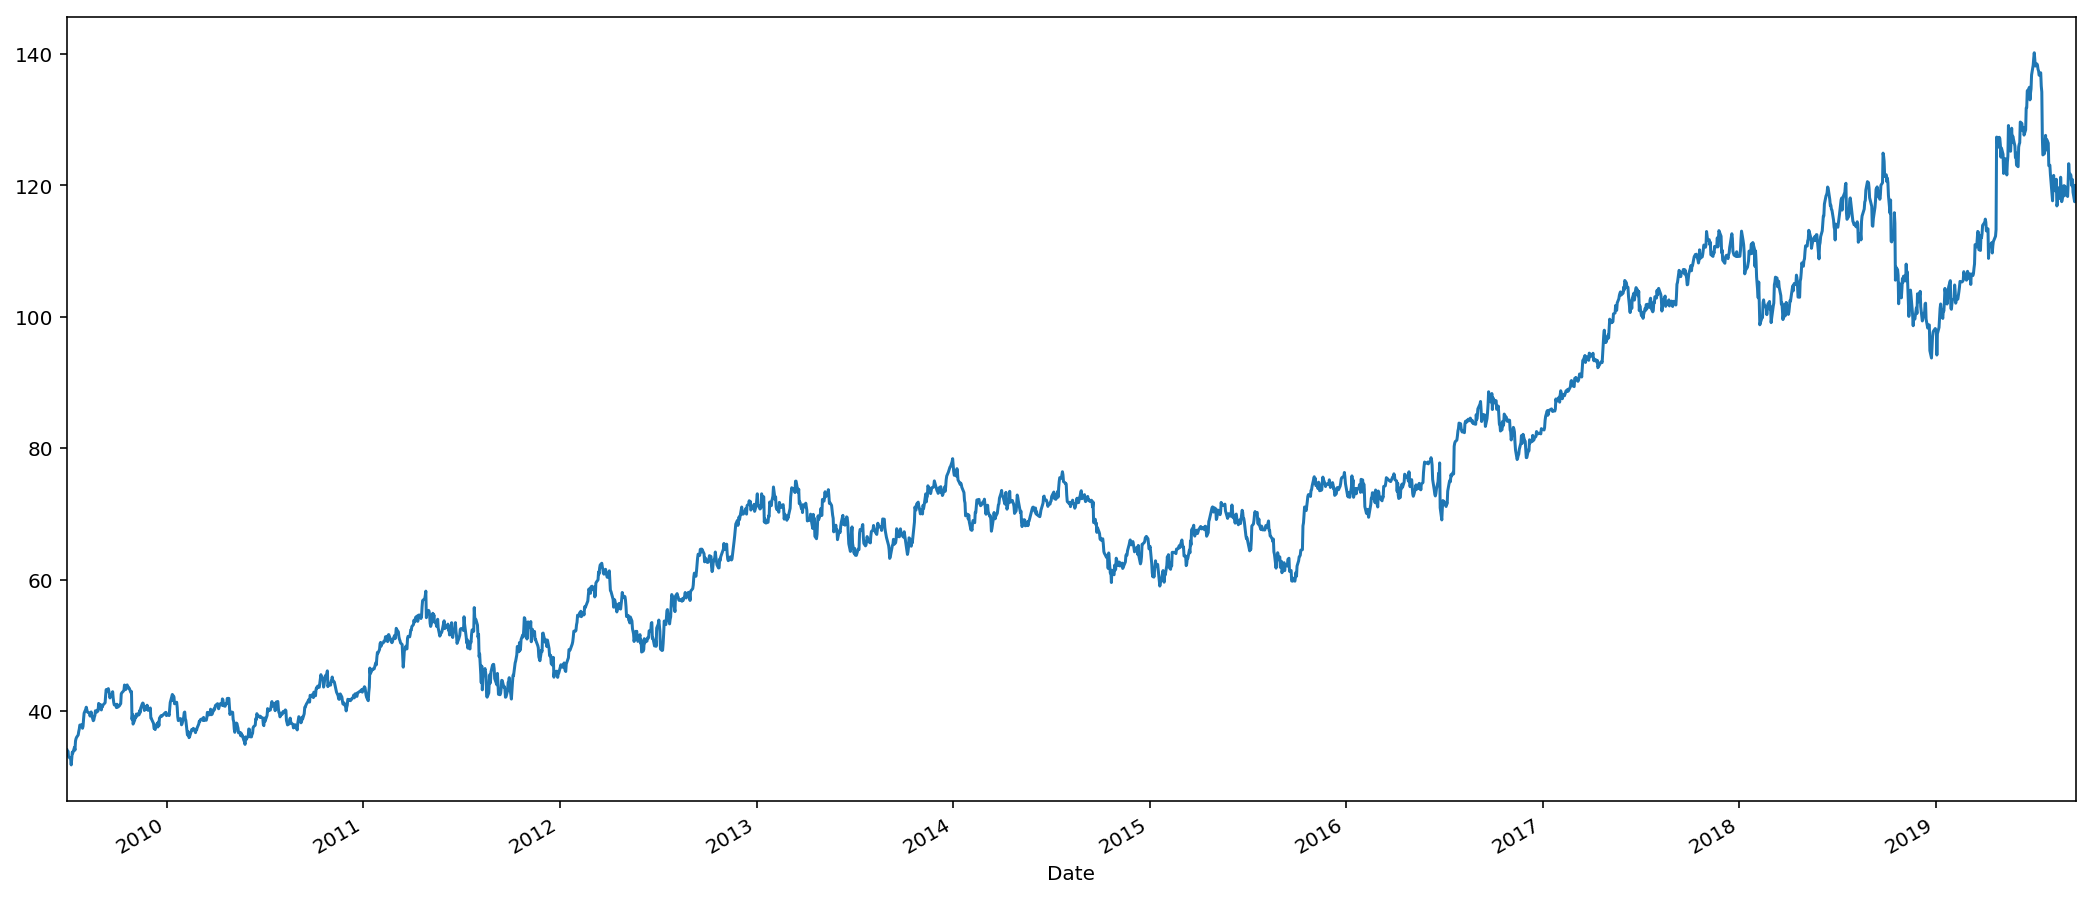

In [1]:
# encoding: UTF-8
import pandas as pd  
import numpy as np
import pandas_datareader.data as web
import datetime
import yfinance as yf

from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

StockPrices = pd.DataFrame()
# 设置股票数据的开始和结束的时间
start = date(2009,6,30)
end=datetime.datetime.today()

StockPrices['SAP'] = web.get_data_yahoo('SAP',start,end)['Adj Close']

# StockPrices['NASDA100'] = quandl.get('NASDAQOMX/NDX', start_date=start, end_date=end)['Index Value']
# 打印数据的前5行 
print(StockPrices.head())
print(StockPrices.tail())
StockPrices['SAP'].plot(figsize=(18,8))
plt.show()

In [2]:
# 增加一列'Returns', 存储每日的收益率
StockPrices["LogSAP"] = np.log(StockPrices['SAP'])
StockPrices['LogReturns'] = StockPrices["LogSAP"].diff(1)
StockPrices['ReturnsPCT'] = StockPrices['SAP'].pct_change()
# 检查前5行数据
print(StockPrices.head())
print(StockPrices.tail())
print('Total Retrun by log method %s' % np.exp(StockPrices["LogReturns"].sum()))
print('Total Retrun by num method %s' % str(119.680000/34.101788))

                  SAP    LogSAP  LogReturns  ReturnsPCT
Date                                                   
2009-06-29  34.101788  3.529350         NaN         NaN
2009-06-30  33.749092  3.518954   -0.010396   -0.010342
2009-07-01  33.900246  3.523422    0.004469    0.004479
2009-07-02  33.085701  3.499101   -0.024321   -0.024028
2009-07-06  32.707821  3.487614   -0.011487   -0.011421
                   SAP    LogSAP  LogReturns  ReturnsPCT
Date                                                    
2019-09-12  120.879997  4.794798    0.007890    0.007921
2019-09-13  118.959999  4.778787   -0.016011   -0.015884
2019-09-16  117.510002  4.766523   -0.012264   -0.012189
2019-09-17  120.010002  4.787575    0.021052    0.021275
2019-09-18  119.680000  4.784822   -0.002754   -0.002750
Total Retrun by log method 3.509493456011742
Total Retrun by num method 3.50949340252


In [4]:
#这里简单演示下log(1+R) 约等于R
testdf =pd.DataFrame()
testdf['returnPct'] =  np.arange(0.01,0.20,0.01)
testdf['returnPct+1'] = testdf['returnPct'] + 1.0
testdf['returnLog'] = np.log(testdf['returnPct+1'])
print(testdf)
print("Total return via log: %s" %np.exp(testdf['returnLog'].sum()))
print("Total return via num: %s" %testdf['returnPct+1'].prod())

    returnPct  returnPct+1  returnLog
0        0.01         1.01   0.009950
1        0.02         1.02   0.019803
2        0.03         1.03   0.029559
3        0.04         1.04   0.039221
4        0.05         1.05   0.048790
5        0.06         1.06   0.058269
6        0.07         1.07   0.067659
7        0.08         1.08   0.076961
8        0.09         1.09   0.086178
9        0.10         1.10   0.095310
10       0.11         1.11   0.104360
11       0.12         1.12   0.113329
12       0.13         1.13   0.122218
13       0.14         1.14   0.131028
14       0.15         1.15   0.139762
15       0.16         1.16   0.148420
16       0.17         1.17   0.157004
17       0.18         1.18   0.165514
18       0.19         1.19   0.173953
Total return via log: 5.973225995171689
Total return via num: 5.973225995171688


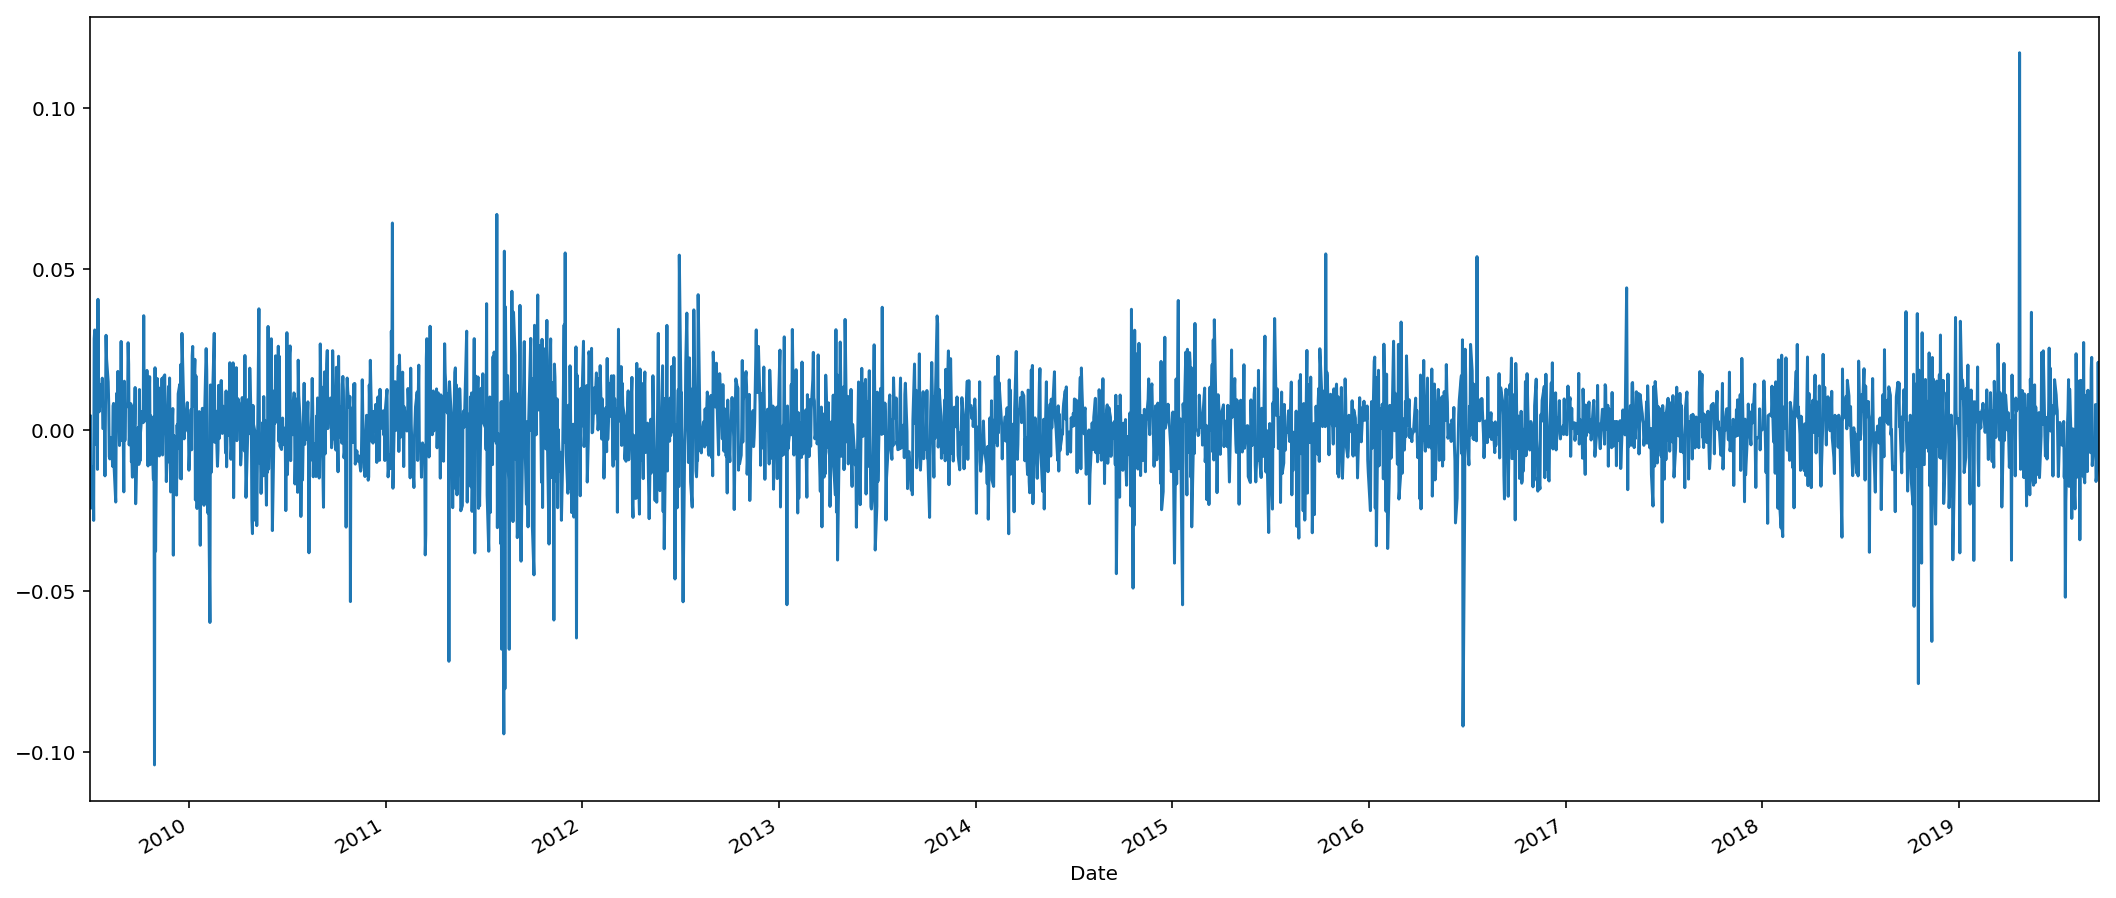

In [5]:
clean_returns = StockPrices['LogReturns'].dropna()

#绘图
clean_returns.plot(figsize=(18,8))
plt.show()

In [7]:
# encoding: UTF-8
import numpy as np
# 计算标准差 
sigma_daily = np.std(clean_returns) 
print("STD: ", sigma_daily) 
# 计算方差 
variance_daily = sigma_daily ** 2 
print("Variance: ", variance_daily)

('STD: ', 0.01499371816779856)
('Variance: ', 0.0002248115844953726)


In [8]:
# 计算年化标准差 
sigma_annualized = sigma_daily *np.sqrt(252)
print("sigma_annualized:", sigma_annualized) 
# 计算年化方差 
variance_annualized = sigma_annualized ** 2 
print("variance_annualized:", variance_annualized)


('sigma_annualized:', 0.23801789700111606)
('variance_annualized:', 0.056652519292833894)


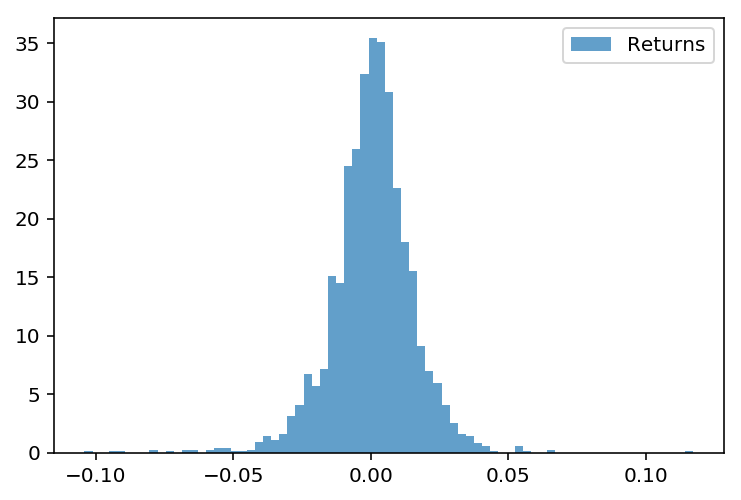

In [9]:
# 绘制收益的概率密度分布图
plt.hist(clean_returns, bins=75, alpha=0.7, density=True, label='Returns')

# 增加图例说明
plt.legend()
# 绘图
plt.show()

           Date    return      Loss       VAR   VAR_WHS
2569 2019-09-12  0.007890  0.007890  0.053442  0.036159
2570 2019-09-13 -0.016011 -0.016011  0.053442  0.036159
2571 2019-09-16 -0.012264 -0.012264  0.053442  0.036159
2572 2019-09-17  0.021052  0.021052  0.053442  0.036159
2573 2019-09-18 -0.002754 -0.002754  0.053442  0.036159


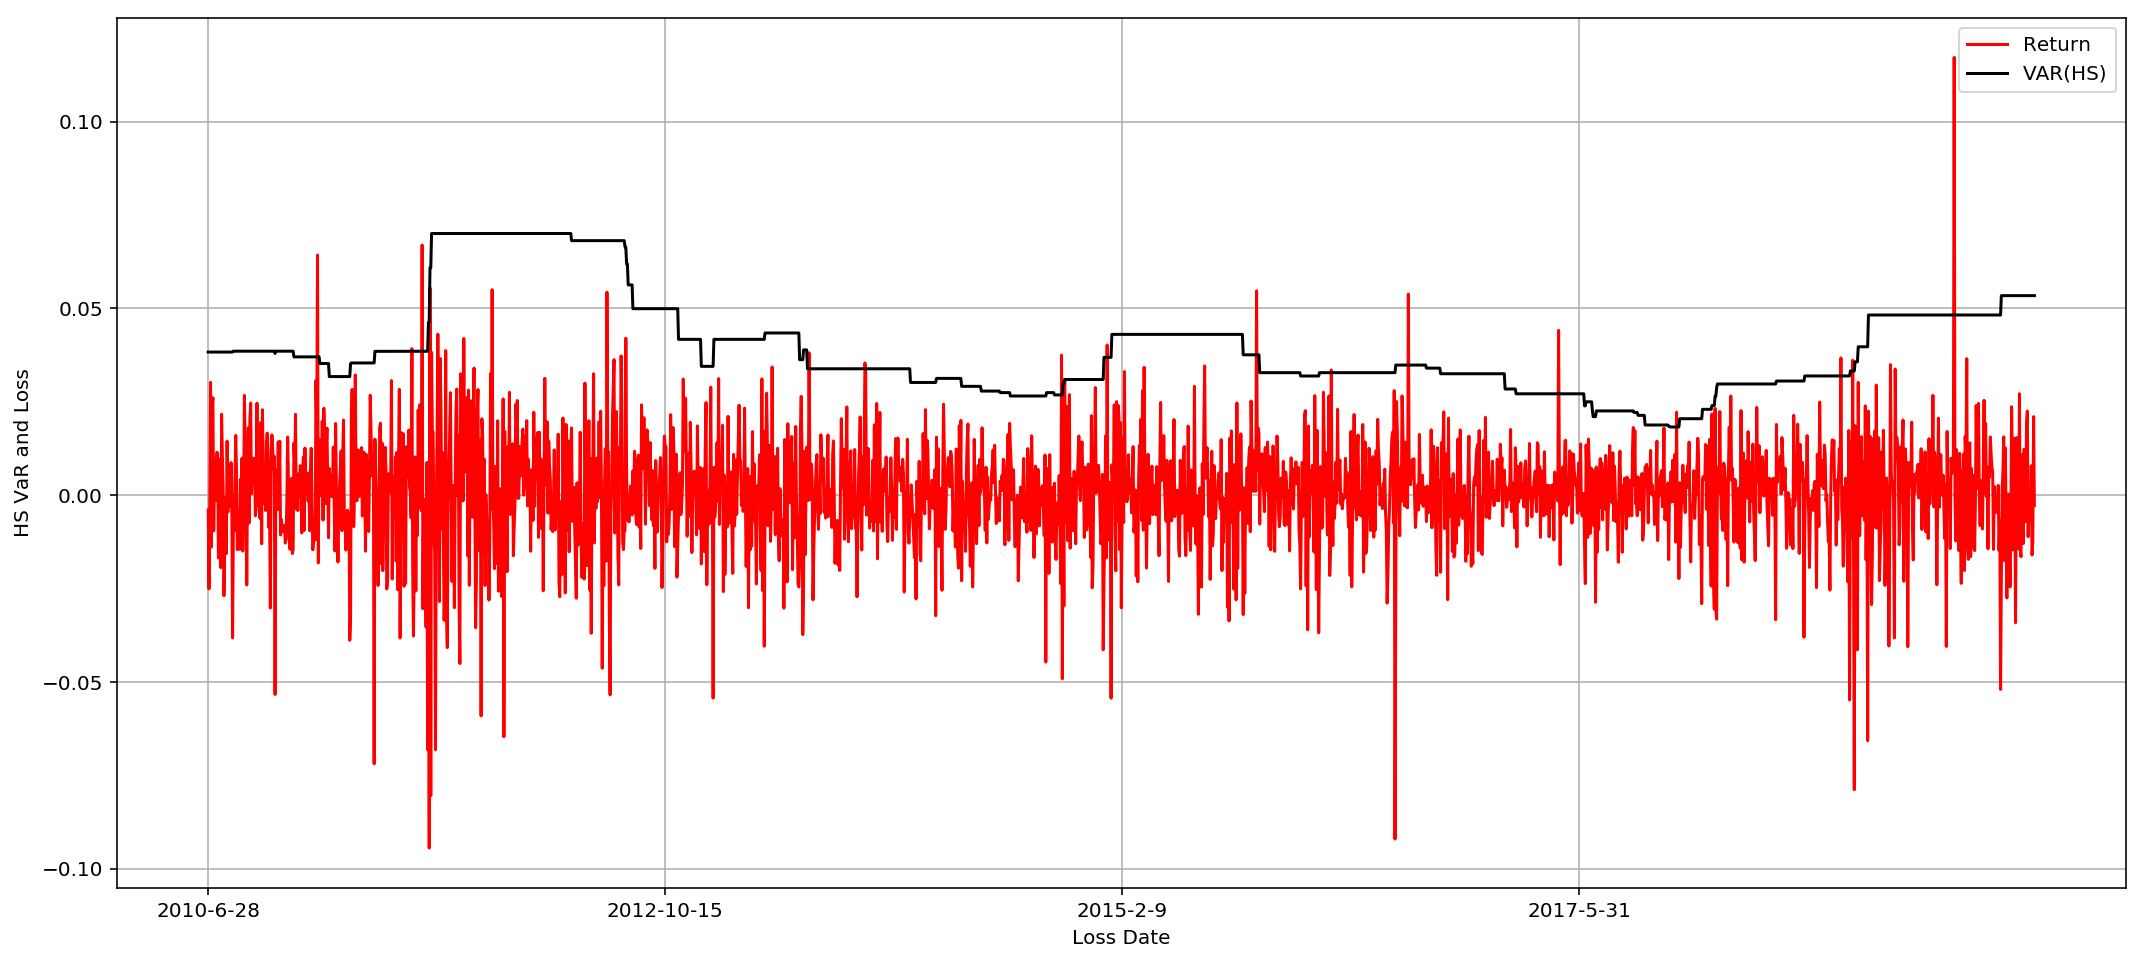

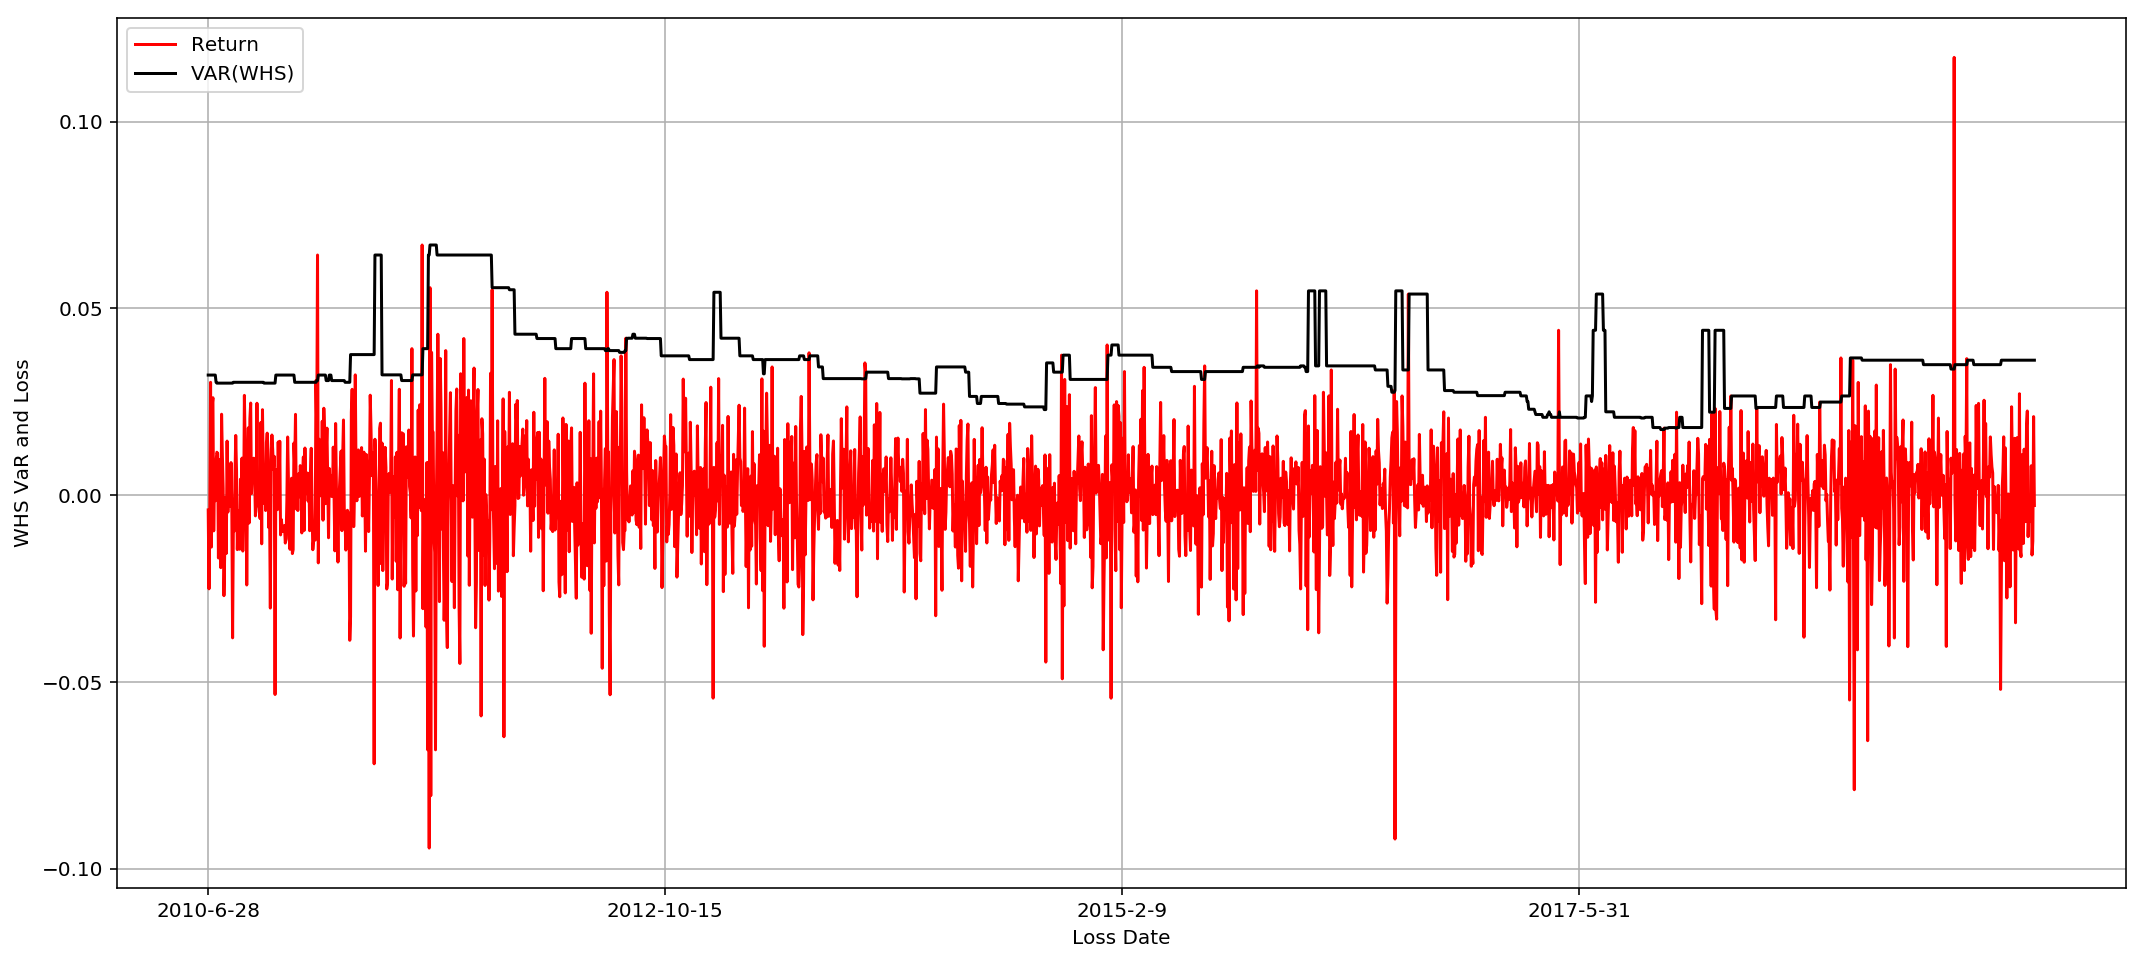

In [10]:
data1 = pd.DataFrame()
data1['return'] = StockPrices["LogReturns"]
data1['Loss'] = data1['return']
data1['VAR'] = np.nan
data1 = data1.reset_index()

# HS和WHS
p = 1 # 1%
window = 250
eta = 0.99
weights = eta ** (np.arange(250,0,-1) - 1)*(1 - eta)/(1 - eta** window) 


for i in range(window + 1,data1.shape[0]):
    datause = data1.loc[i - window:i-1,'return']
    data1.loc[i,'VAR'] =  -np.percentile(datause,p)
    data1.loc[i,'VAR_WHS'] = np.sort(datause)[np.min(np.where(weights[np.argsort(-datause)].cumsum()> 0.99))]

print(data1.tail())
# 作图
data11 = data1.loc[window+1:,:].copy()
data11 = data11.reset_index(drop = True)
X = np.arange(data11.shape[0])
xticklabel = data11.loc[:,'Date'].apply(lambda x:str(x.year) + '-' +str(x.month) + '-' +str(x.day))
xticks = np.arange(0,data11.shape[0]+1,np.int((data11.shape[0]+1)/4))


plt.figure(figsize=(18,8))
SP = plt.axes()
SP.plot(X,data11['Loss'], color = 'red',label = 'Return')     
SP.plot(X,data11.VAR,color = 'black',label = 'VAR(HS)')   
SP.set_xticks(xticks)
SP.set_xticklabels(xticklabel[xticks])
plt.xlabel('Loss Date')
plt.ylabel('HS VaR and Loss')
plt.grid()
plt.legend()

plt.figure(figsize=(18,8))
SP = plt.axes()
SP.plot(X,data11['Loss'], color = 'red',label = 'Return')     
SP.plot(X,data11.VAR_WHS,color = 'black',label = 'VAR(WHS)')   
SP.set_xticks(xticks)
SP.set_xticklabels(xticklabel[xticks])
plt.xlabel('Loss Date')
plt.ylabel('WHS VaR and Loss')
plt.grid()
plt.legend()

In [11]:
#假设投入金融为一万美圆（$10000),那么最后一日，概率为1%的最大损失是
VARbyDollor = 10000.0*(1-np.exp(-data1['VAR']))
WVARbyDollor = 10000.0*(1-np.exp(-data1['VAR_WHS']))
print("$VAR, %s; $WVAR, %s" %(np.array(VARbyDollor)[-1] , (np.array(WVARbyDollor)[-1])))

$VAR, 520.389708227822; $WVAR, 355.1353095410303


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12D55AB0>,
      dtype=object)

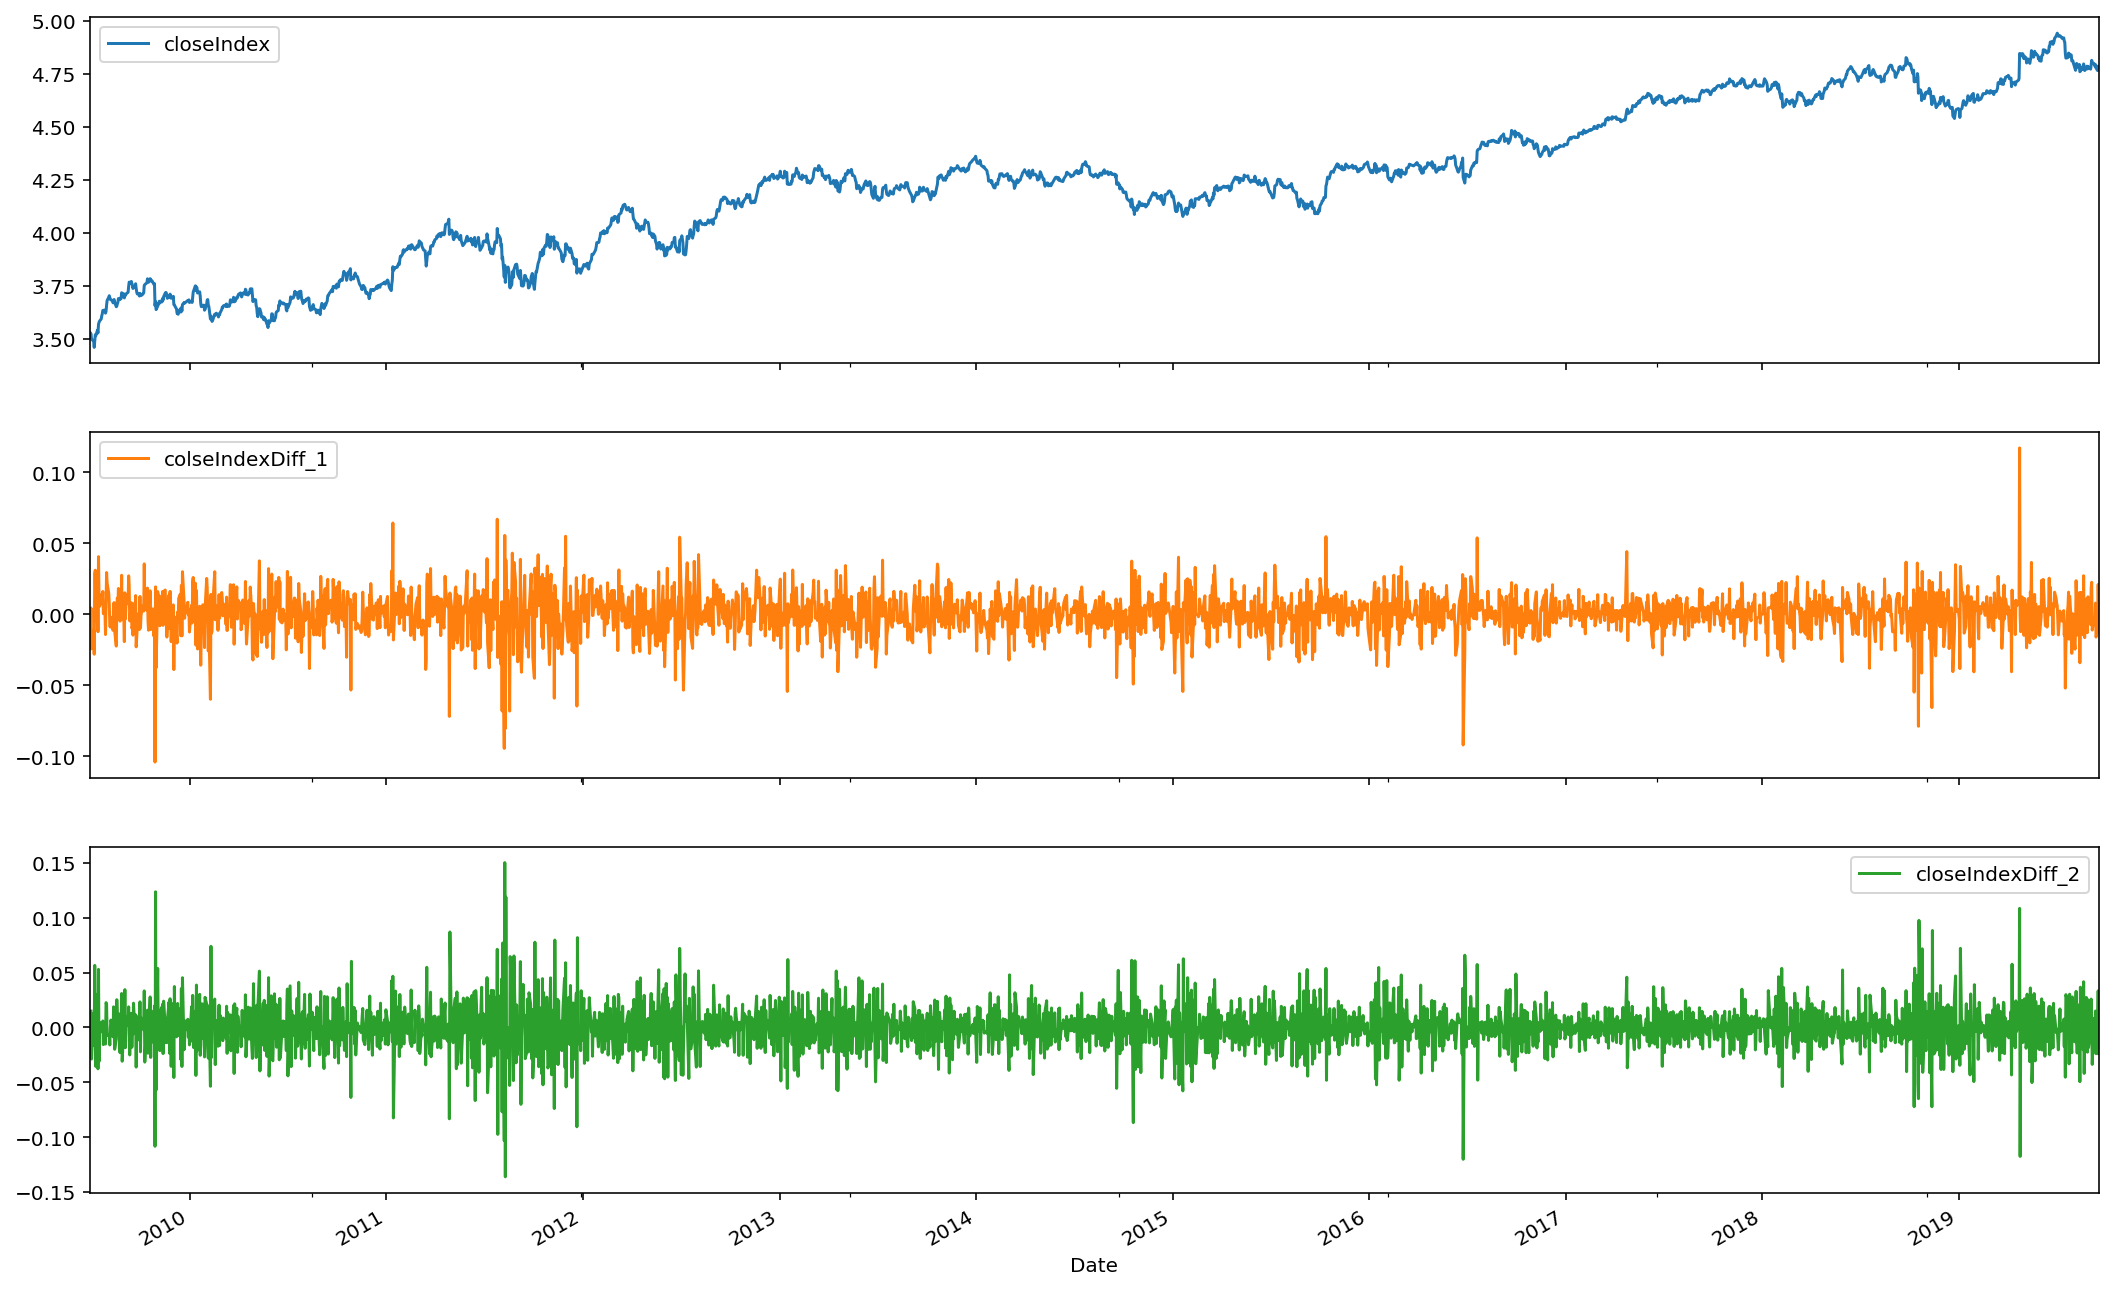

In [12]:
"""
均值和方差：平稳时间序列粗略地讲，一个时间序列，如果均值没有系统的变化（无趋势）、
方差没有系统变化，且严格消除了周期性变化，就称之是平稳的。
"""
IndexData = pd.DataFrame()
IndexData['closeIndex'] = StockPrices['LogSAP']
IndexData['colseIndexDiff_1'] = IndexData['closeIndex'].diff()  # 1阶差分处理
IndexData['closeIndexDiff_2'] = IndexData['colseIndexDiff_1'].diff()  # 2阶差分处理

IndexData.plot(subplots=True,figsize=(18,12))

In [14]:
from scipy import  stats
import statsmodels.api as sm  # 统计相关的库

data = IndexData['colseIndexDiff_1'].dropna() 
m = 10 # 我们检验10个自相关系数

acf,q,p = sm.tsa.acf(data,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:11], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output
#如果AC存在大于0的值，可以理解非平稳,
#如下，都是0附件活动，可以理解是AR自回归数列

,AC,Q,P-value
lag,,,
1.0,-0.067238,11.646069,0.000643
2.0,0.052038,18.624598,0.000090
3.0,-0.029834,20.919158,0.000109
4.0,-0.017348,21.695343,0.000230
5.0,-0.051921,28.650515,0.000027
6.0,0.042239,33.255294,0.000009
7.0,0.020497,34.340112,0.000015
8.0,-0.017504,35.131492,0.000025
9.0,-0.026816,36.989702,0.000026


In [15]:
from statsmodels.tsa.stattools import kpss
kpss(temp)

NameError: name 'temp' is not defined

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox as ljbox
ljbox(temp, lags=1)

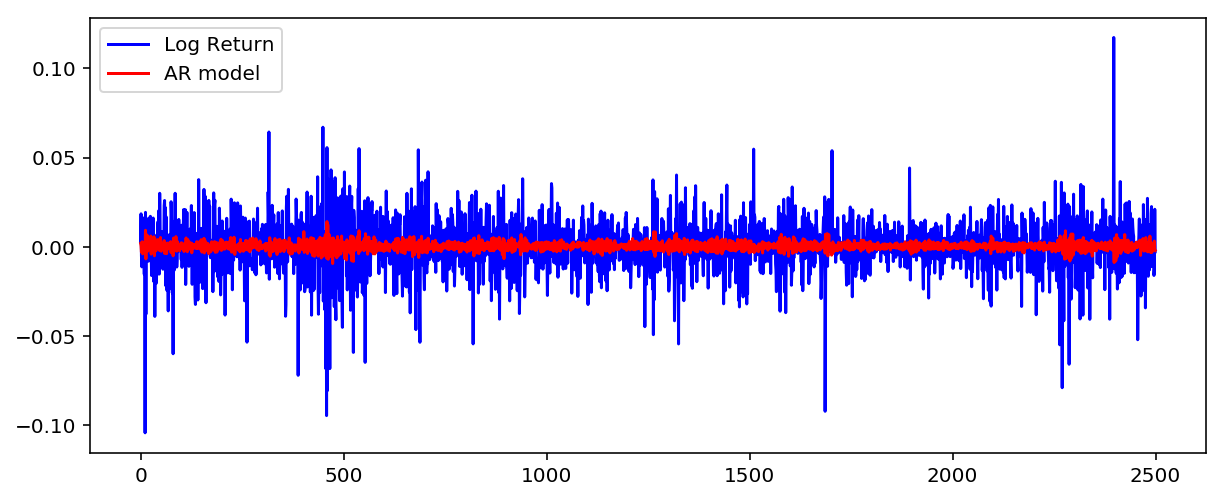

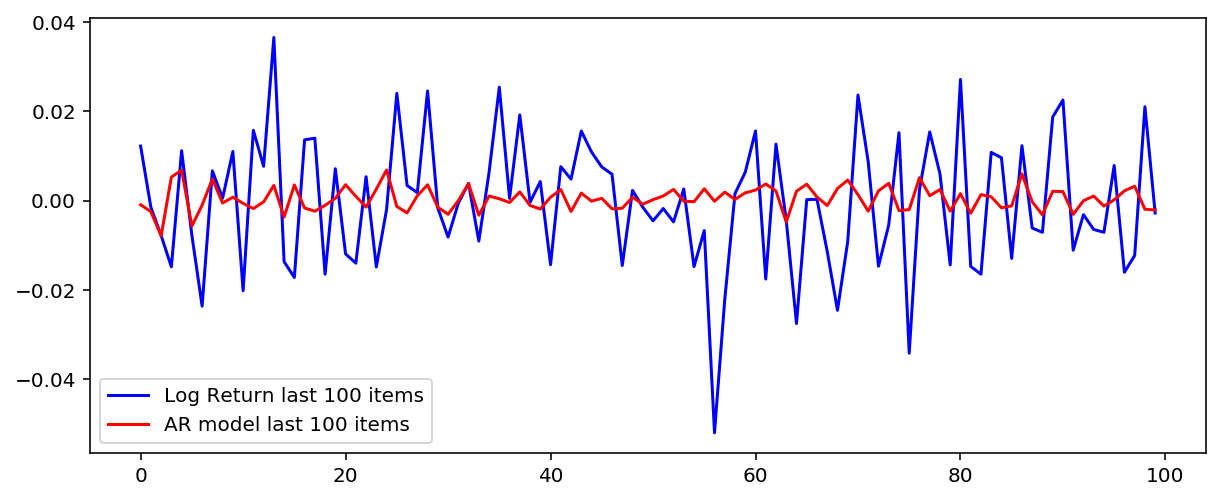

In [16]:
temp = np.array(data) # 载入收益率序列
model = sm.tsa.AR(temp)  
results_AR = model.fit()  
# print(len(temp))
# print(len(results_AR.fittedvalues))
plt.figure(figsize=(10,4))
plt.plot(temp[-2500:],'b',label='Log Return')
plt.plot(results_AR.fittedvalues[-2500:], 'r',label='AR model')
plt.legend()
plt.show()
plt.figure(figsize=(10,4))
plt.plot(temp[-100:],'b',label='Log Return last 100 items')
plt.plot(results_AR.fittedvalues[-100:], 'r',label='AR model last 100 items')
plt.legend()
plt.show()

In [17]:
print len(results_AR.roots)
results_AR.roots

27


array([-1.09885182-0.14562431j, -1.09885182+0.14562431j,
       -1.07024392-0.411308j  , -1.07024392+0.411308j  ,
       -0.83612803-0.77296955j, -0.83612803+0.77296955j,
       -1.00441473-0.68371294j, -1.00441473+0.68371294j,
       -0.56005445-0.95957389j, -0.56005445+0.95957389j,
       -0.33163734-1.053567j  , -0.33163734+1.053567j  ,
       -0.04412108-1.09673053j, -0.04412108+1.09673053j,
        1.15609708-0.j        ,  1.10512539-0.2648376j ,
        1.10512539+0.2648376j ,  1.00389   -0.52168367j,
        1.00389   +0.52168367j,  0.8336855 -0.76653097j,
        0.8336855 +0.76653097j,  0.30929918-1.11629141j,
        0.30929918+1.11629141j,  0.59893548-1.06323526j,
        0.59893548+1.06323526j,  0.64303392-1.07876477j,
        0.64303392+1.07876477j])

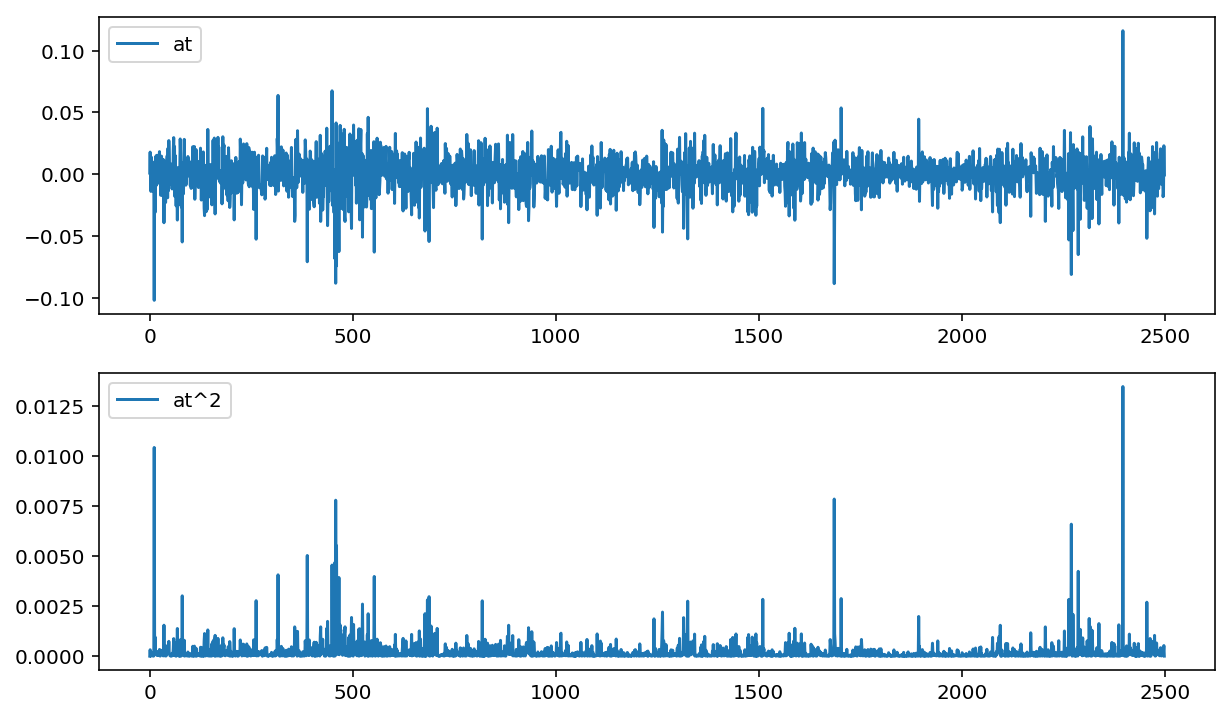

In [18]:
at = temp[-2500:] -  results_AR.fittedvalues[-2500:]
at2 = np.square(at)
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(at,label = 'at')
plt.legend()
plt.subplot(212)
plt.plot(at2,label='at^2')
plt.legend(loc=0)
#可以看出新息序列a，存在聚集情况，虽然不相关，但是不独立。

In [19]:
m = 10# 我们检验25个自相关系数
acf,q,p = sm.tsa.acf(at2,nlags=m,qstat=True)  ## 计算自相关系数 及p-value
out = np.c_[range(1,11), acf[1:], q, p]
output=pd.DataFrame(out, columns=['lag', "AC", "Q", "P-value"])
output = output.set_index('lag')
output

,AC,Q,P-value
lag,,,
1.0,0.049709,6.184945,1.288417e-02
2.0,0.132417,50.091008,1.327015e-11
3.0,0.031540,52.582928,2.249884e-11
4.0,0.068787,64.440491,3.375421e-13
5.0,0.040546,68.561866,2.040720e-13
6.0,0.068189,80.223622,3.212343e-15
7.0,0.048230,86.059958,7.953083e-16
8.0,0.042671,90.630178,3.463689e-16
9.0,0.070657,103.166327,3.595305e-18


In [20]:
from arch import arch_model
am = arch_model(temp,mean='AR',lags=8,vol='ARCH',p=4) 
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:     16,   Neg. LLF: -7213.51925421
Iteration:      2,   Func. Count:     38,   Neg. LLF: -7213.52531358
Iteration:      3,   Func. Count:     59,   Neg. LLF: -7214.46689592
Iteration:      4,   Func. Count:     78,   Neg. LLF: -7214.6490196
Iteration:      5,   Func. Count:     96,   Neg. LLF: -7218.15484331
Iteration:      6,   Func. Count:    116,   Neg. LLF: -7218.15913092
Iteration:      7,   Func. Count:    135,   Neg. LLF: -7218.61660318
Iteration:      8,   Func. Count:    153,   Neg. LLF: -7218.76577117
Iteration:      9,   Func. Count:    173,   Neg. LLF: -7218.77476332
Iteration:     10,   Func. Count:    191,   Neg. LLF: -7220.16390477
Iteration:     11,   Func. Count:    210,   Neg. LLF: -7221.22102011
Iteration:     12,   Func. Count:    229,   Neg. LLF: -7221.28252959
Iteration:     13,   Func. Count:    248,   Neg. LLF: -7221.34967883
Iteration:     14,   Func. Count:    267,   Neg. LLF: -7221.38180023
Iteration:     15,   Func. Count:  

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - ARCH Model Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.012
Mean Model:                        AR   Adj. R-squared:                  0.009
Vol Model:                       ARCH   Log-Likelihood:                7222.71
Distribution:                  Normal   AIC:                          -14417.4
Method:            Maximum Likelihood   BIC:                          -14335.5
                                        No. Observations:                 2565
Date:                Thu, Sep 19 2019   Df Residuals:                     2551
Time:                        16:41:14   Df Model:                           14
                                   Mean Model                                  
===============================================================================
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const       4.8168e-04  2.999e-04      1.606      0.108  [-1.061e-04,1.069e-03]
y[1]           -0.0474  2.323e-02     -2.043  4.107e-02 [-9.297e-02,-1.925e-03]
y[2]            0.0546  2.560e-02      2.132  3.299e-02     [4.408e-03,  0.105]
y[3]        6.6992e-03  2.396e-02      0.280      0.780  [-4.027e-02,5.366e-02]
y[4]           -0.0286  2.594e-02     -1.103      0.270  [-7.946e-02,2.223e-02]
y[5]           -0.0489  2.594e-02     -1.886  5.933e-02  [-9.977e-02,1.926e-03]
y[6]            0.0416  3.002e-02      1.384      0.166    [-1.728e-02,  0.100]
y[7]            0.0292  2.651e-02      1.100      0.271  [-2.279e-02,8.114e-02]
y[8]       -9.2691e-04  2.739e-02 -3.384e-02      0.973  [-5.461e-02,5.276e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.4680e-04  1.583e-05      9.276  1.766e-20 [1.158e-04,1.778e-04]
alpha[1]       0.0425  3.393e-02      1.251      0.211  [-2.404e-02,  0.109]
alpha[2]       0.1772  5.534e-02      3.202  1.363e-03   [6.875e-02,  0.286]
alpha[3]       0.0615  5.134e-02      1.198      0.231  [-3.912e-02,  0.162]
alpha[4]       0.0762  3.818e-02      1.995  4.599e-02   [1.355e-03,  0.151]
============================================================================

Covariance estimator: robust
"""

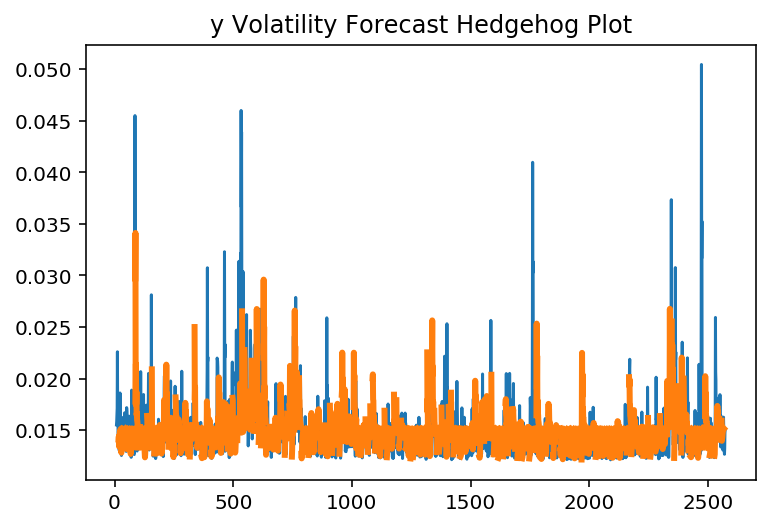

In [21]:
fig = res.hedgehog_plot()

In [22]:
GARCH_am = arch_model(temp,mean='AR',lags=8,vol='GARCH') 
GARCH_res = GARCH_am.fit()
GARCH_res.summary()

Iteration:      1,   Func. Count:     14,   Neg. LLF: -7259.91014208
Iteration:      2,   Func. Count:     35,   Neg. LLF: -7259.9471615
Iteration:      3,   Func. Count:     57,   Neg. LLF: -7259.95435434
Iteration:      4,   Func. Count:     79,   Neg. LLF: -7259.95462725
Iteration:      5,   Func. Count:    103,   Neg. LLF: -7259.95463025
Iteration:      6,   Func. Count:    124,   Neg. LLF: -7259.95587487
Iteration:      7,   Func. Count:    147,   Neg. LLF: -7259.95588629
Iteration:      8,   Func. Count:    168,   Neg. LLF: -7259.95762981
Iteration:      9,   Func. Count:    189,   Neg. LLF: -7259.9582178
Iteration:     10,   Func. Count:    210,   Neg. LLF: -7259.95882388
Iteration:     11,   Func. Count:    234,   Neg. LLF: -7259.95873491
Iteration:     12,   Func. Count:    257,   Neg. LLF: -7259.95880161
Iteration:     13,   Func. Count:    281,   Neg. LLF: -7259.95882558
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -7259

C:\ProgramData\Anaconda2\lib\site-packages\arch\univariate\base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Mean Model:                        AR   Adj. R-squared:                  0.010
Vol Model:                      GARCH   Log-Likelihood:                7259.96
Distribution:                  Normal   AIC:                          -14495.9
Method:            Maximum Likelihood   BIC:                          -14425.7
                                        No. Observations:                 2565
Date:                Thu, Sep 19 2019   Df Residuals:                     2553
Time:                        16:43:36   Df Model:                           12
                                  Mean Model                                  
==============================================================================
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const      5.9951e-04  2.845e-04      2.108  3.507e-02   [4.197e-05,1.157e-03]
y[1]          -0.0641  2.350e-02     -2.727  6.397e-03    [ -0.110,-1.802e-02]
y[2]           0.0503  2.291e-02      2.197  2.806e-02   [5.420e-03,9.524e-02]
y[3]          -0.0203  2.070e-02     -0.979      0.328  [-6.082e-02,2.031e-02]
y[4]          -0.0278  2.267e-02     -1.229      0.219  [-7.227e-02,1.658e-02]
y[5]          -0.0518  2.364e-02     -2.193  2.833e-02 [-9.815e-02,-5.501e-03]
y[6]           0.0409  2.215e-02      1.848  6.460e-02  [-2.480e-03,8.435e-02]
y[7]           0.0285  2.199e-02      1.298      0.194  [-1.455e-02,7.165e-02]
y[8]          -0.0217  2.228e-02     -0.974      0.330  [-6.536e-02,2.196e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.4231e-06  1.288e-13  3.435e+07      0.000 [4.423e-06,4.423e-06]
alpha[1]       0.0500  4.402e-04    113.587      0.000 [4.914e-02,5.086e-02]
beta[1]        0.9300  4.216e-03    220.579      0.000     [  0.922,  0.938]
============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Positive directional derivative for linesearch. See convergence_flag.
"""

In [23]:
GARCH_res.params

Const       0.000600
y[1]       -0.064080
y[2]        0.050329
y[3]       -0.020252
y[4]       -0.027846
y[5]       -0.051825
y[6]        0.040936
y[7]        0.028549
y[8]       -0.021704
omega       0.000004
alpha[1]    0.050000
beta[1]     0.930000
Name: params, dtype: float64

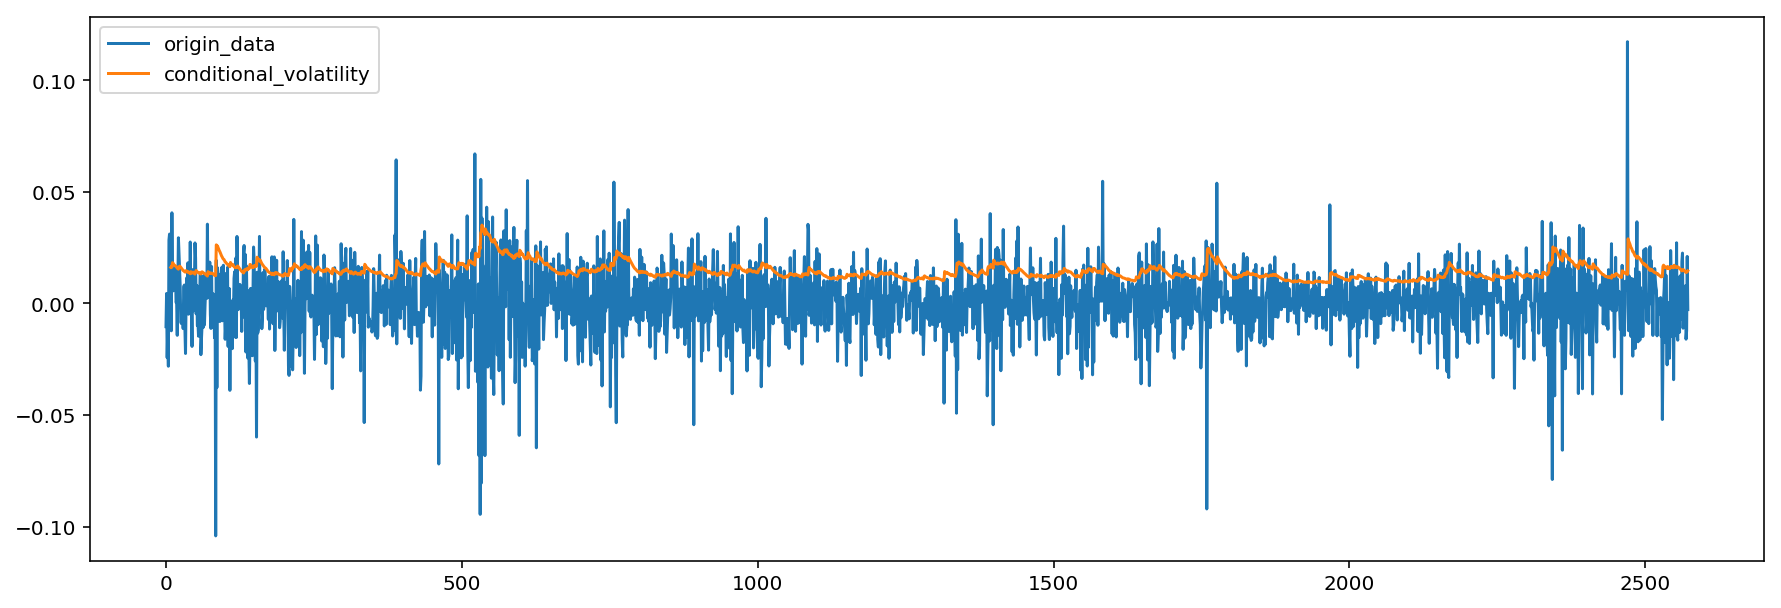

In [24]:
from scipy.special import gammaln
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm,t
import matplotlib.pyplot as plt
p = 0.01
phi =  norm(0,1).ppf(p)
plt.figure(figsize=(15,5))
plt.plot(temp,label='origin_data')
plt.plot(GARCH_res.conditional_volatility,label='conditional_volatility')
plt.legend(loc=0)

Conditional Volatility: 0.014583944979244928; IDCF(0.01): -2.3263478740408408
$VAR_GARCH: 333.58251476682034


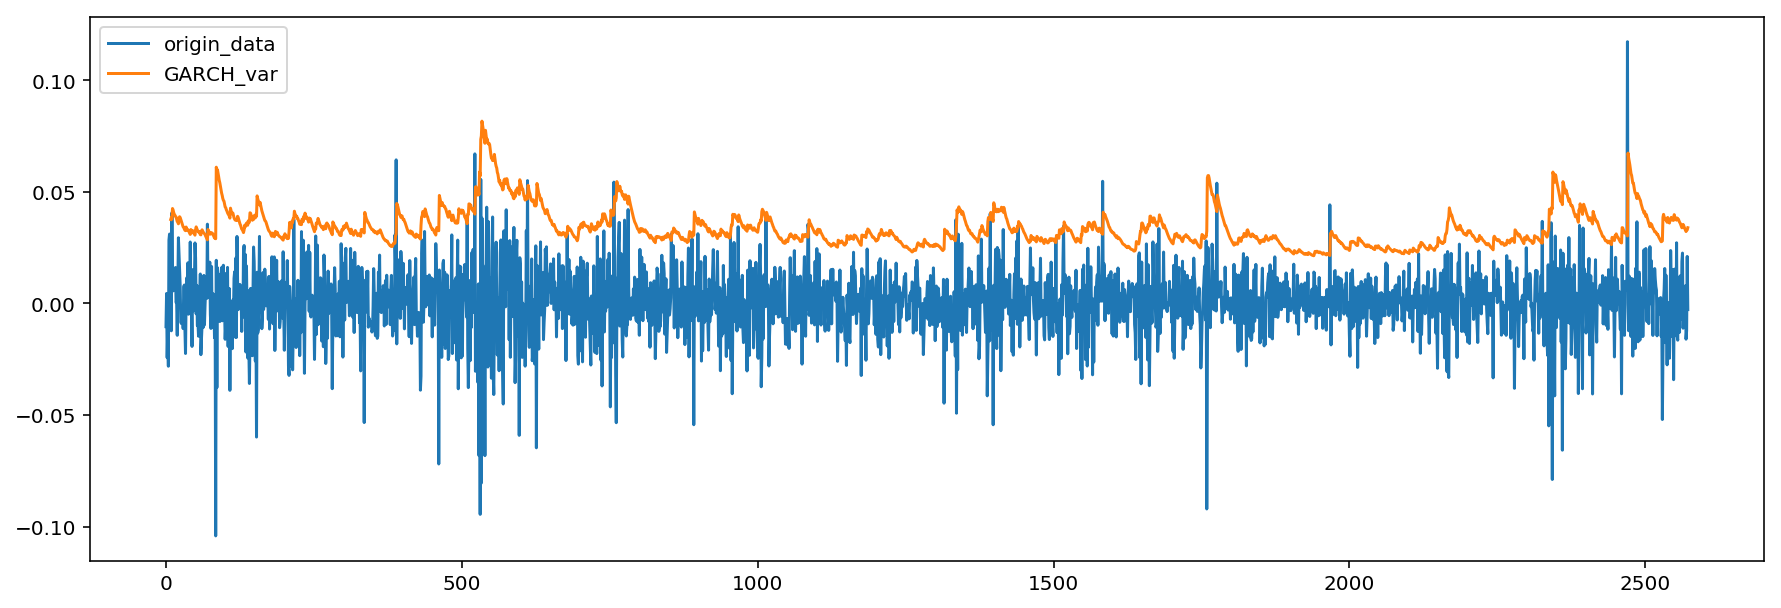

In [25]:
p = 0.01
phi =  norm(0,1).ppf(p)
plt.figure(figsize=(15,5))
plt.plot(temp,label='origin_data')
GARCH_var = -GARCH_res.conditional_volatility * phi
plt.plot(GARCH_var,label='GARCH_var')
plt.legend(loc=0)
print("Conditional Volatility: %s; IDCF(0.01): %s" %(GARCH_res.conditional_volatility[-1], phi))
print("$VAR_GARCH: %s" %(10000.0*(1-np.exp(-GARCH_var[-1]))))

In [30]:
data5 = pd.DataFrame()
data5["logreturn"] =StockPrices["LogReturns"]
data5 = data5.reset_index()
logarray = np.array(StockPrices["LogReturns"])

periodNum = 22 # 22 for month. 252 for year
for i in range(periodNum,len(logarray)): 
    data5.loc[i,'sigma'] = np.std(logarray[i-periodNum + 1:i])
data5 = data5[periodNum:]
data5 = data5.reset_index(drop=True)
data5['z'] = data5['logreturn']/data5['sigma']
data5 = data5.dropna()
data5 = data5.reset_index(drop = True)
data5.tail()

,Date,logreturn,sigma,z
2547,2019-09-12,0.007890,0.015135,0.521313
2548,2019-09-13,-0.016011,0.014868,-1.076850
2549,2019-09-16,-0.012264,0.013305,-0.921727
2550,2019-09-17,0.021052,0.013586,1.549456
2551,2019-09-18,-0.002754,0.013937,-0.197577


C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


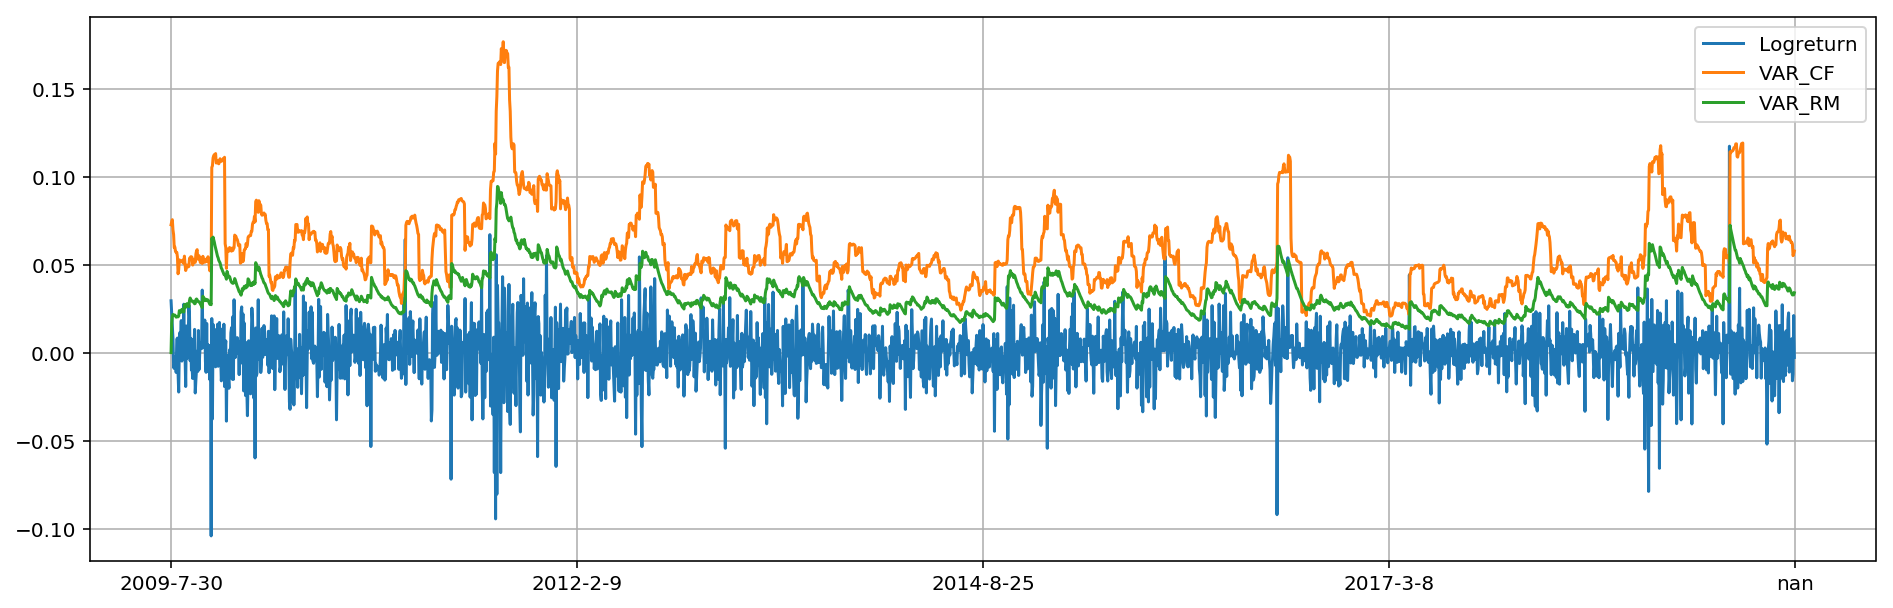

In [31]:
import pandas as pd 
import numpy as np
from scipy import optimize
from scipy.special import gammaln
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm,t
import matplotlib.pyplot as plt
p = 0.01
phi =  norm(0,1).ppf(p)
# data5['VAR_EVT'] = -data5['sigma']*u*(p/(Tu/T))**(-xi)
# data5['VAR_norm'] = - data5['sigma']*phi
# data5['VAR_t'] = - data5['sigma']*t(d_best[0]).ppf(p)*((d_best[0] - 2)/d_best[0])**0.5
data5['VAR_CF'] = - data5['sigma']*(phi + data5.z.skew()/6*(phi**2-1) + \
                                    data5.z.kurt()/24*(phi**3-3*phi) - data5.z.skew()**2/36*(2*phi**3-5*phi))

data5['sigma2_RM'] = np.nan
data5.loc[0,'sigma2_RM'] = 0
for i in range(data5.shape[0] - 1):
    data5.loc[i + 1,'sigma2_RM'] = data5.loc[i,'sigma2_RM']*0.94 + 0.06*data5.loc[i,'logreturn']**2
data5['VAR_RM'] = -data5['sigma2_RM']**0.5 * phi

xticklabel = data5.loc[:,'Date'].apply(lambda x:str(x.year) + '-' +str(x.month) + '-' +str(x.day))
xticks = np.arange(0,data5.shape[0]+1,np.int((data5.shape[0]+1)/4))
X = np.arange(data5.shape[0])
plt.figure(figsize=(16,5))
SP = plt.axes()      
# plt.plot(X,data5.VAR_EVT,label = 'VAR_EVT')  
# plt.plot(X,data5.VAR_norm,label = 'VAR_EVT') 
plt.plot(X,data5.logreturn,label = 'Logreturn') 
plt.plot(X,data5.VAR_CF,label = 'VAR_CF') 
plt.plot(X,data5.VAR_RM,label = 'VAR_RM') 
SP.set_xticks(xticks)
SP.set_xticklabels(xticklabel[xticks])

plt.grid()
plt.legend()
plt.show()

In [32]:
#假设投入金融为一万美圆（$10000),那么最后一日，概率为1%的最大损失是
VAR_CF = 10000.0*(1-np.exp(-data5['VAR_CF']))
VAR_RM = 10000.0*(1-np.exp(-data5['VAR_RM']))
print("$VAR_RM: %s, $VAR_CF: %s" %(np.array(VAR_RM)[-1], np.array(VAR_CF)[-1]))

$VAR_RM: 334.0027961428904, $VAR_CF: 560.5237335657221


,VaR
0,0.047242
1,0.091619
2,0.172499
3,0.177831
4,0.217835


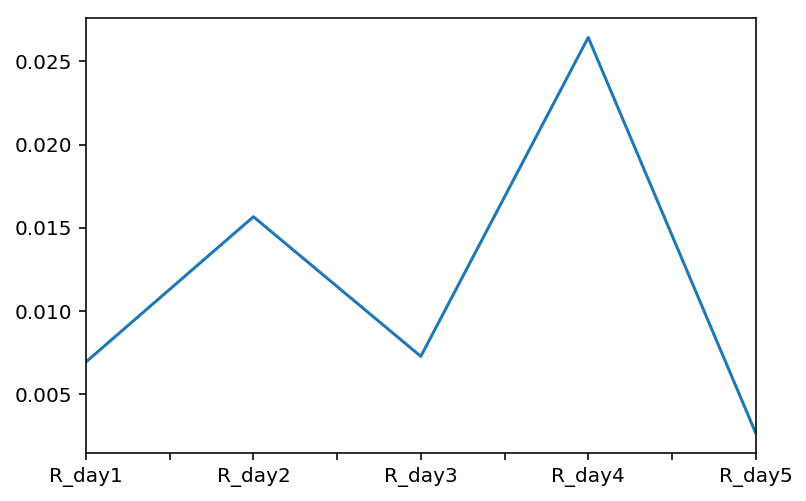

In [34]:
def VaR_Monte(num,p,mean, sigma_first,ndays):
    np.random.seed(4)
    MC = num
    sigma2_Garch = sigma_first**2
    data_MC = pd.DataFrame(index = range(MC))
    data_R = pd.DataFrame(index = range(MC))
    data_MC['z_day1'] =  np.random.normal(size = (num,1))
    data_R['R_day1'] = mean + sigma2_Garch**0.5 * data_MC['z_day1']
    data_MC['sigma2_day1'] =  0.000006 + 0.1*(data_R['R_day1'] - 1.37387691043997*sigma2_Garch**0.5)**2  +  0.88*sigma2_Garch

    # 低2-10天公式一样，循环
    for i in range(2,ndays +1):
        exec("data_MC['z_day" + str(i) + "'] = np.random.normal(size = (10000,1))")
        exec("data_R['R_day" + str(i) + "'] = data_MC['sigma2_day" + str(i-1) + "']**0.5 * data_MC['z_day" + str(i) + "']")
        exec("data_MC['sigma2_day" + str(i) + "'] = 0.00006 + 0.1*(data_R['R_day" + str(i) + "'] - 1.37387691043997*data_MC['sigma2_day" + str(i -1) + "']**0.5)**2 + 0.88*data_MC['sigma2_day" + str(i-1) + "']")
    VaR = pd.DataFrame(index = range(ndays))

    for i in range(ndays):
        R_ndays = data_R.iloc[:,:i+1].sum(axis = 1)
        VaR.loc[i,'VaR'] = - np.percentile(R_ndays,p) 
    
    if ndays > 1:
        data_R.loc[1,:].plot()
    else:
#         data_R['R_day1'].plot()
        plt.hist(data_R['R_day1'], bins=75, alpha=0.7, density=True)
    return VaR


p = 0.01
num = 10000
mean = np.mean(data5.logreturn[-252:])
sigma_first = 0.01379305642901181
ndays =5

VaR_Monte(num,p,mean,sigma_first,ndays)